C:\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test Set Results:
   n_estimators  Mean Squared Error  Root Mean Squared Error  \
0            10        8.145775e+05               902.539460   
1            50        1.179321e+06              1085.965267   
2           100        1.365997e+06              1168.758595   
3           200        1.445755e+06              1202.395455   
4           500        1.546949e+06              1243.764218   

   Mean Absolute Error       R^2  
0           695.952128  0.797689  
1           947.746149  0.707101  
2          1036.493921  0.660737  
3          1075.287335  0.640928  
4          1116.840700  0.615795  
Train Set Results:
   n_estimators  Mean Squared Error  Root Mean Squared Error  \
0            10        8.023720e+05               895.752184   
1            50        1.154048e+06              1074.266080   
2           100        1.348008e+06              1161.037541   
3           200        1.428169e+06              1195.060258   
4           500        1.530157e+06             

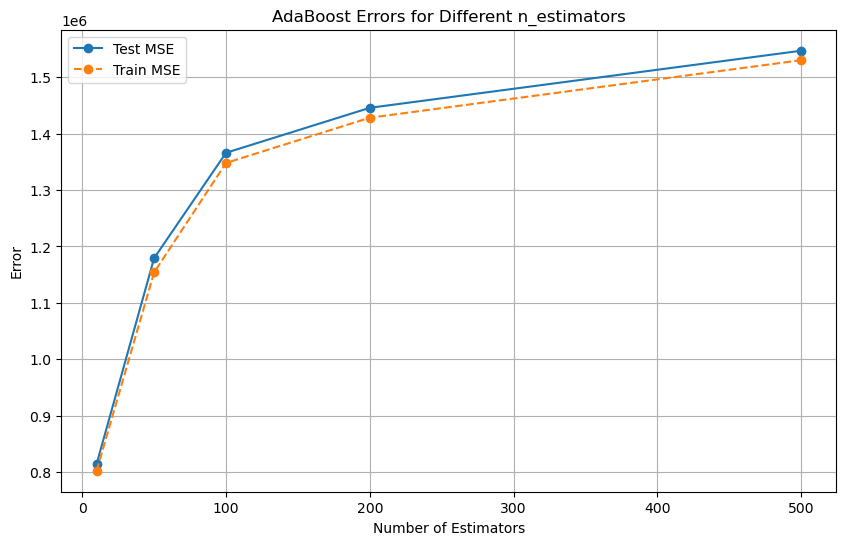

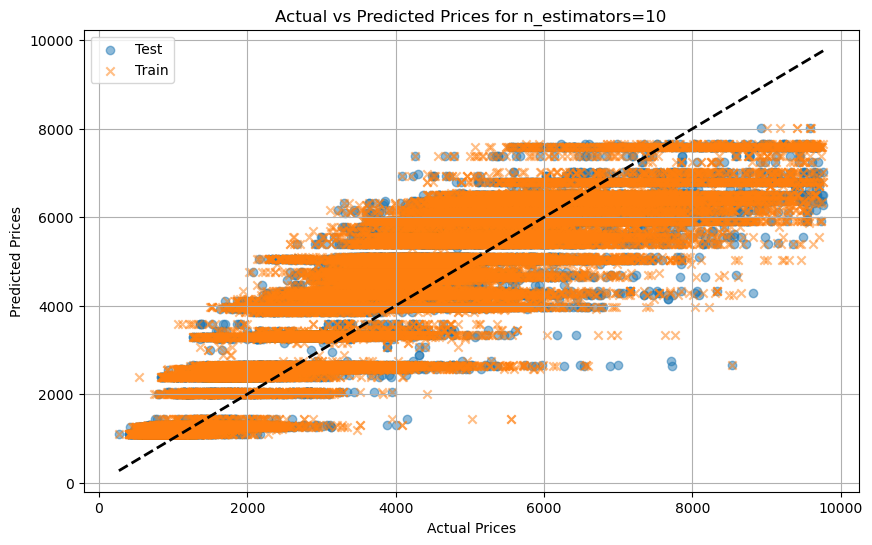

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

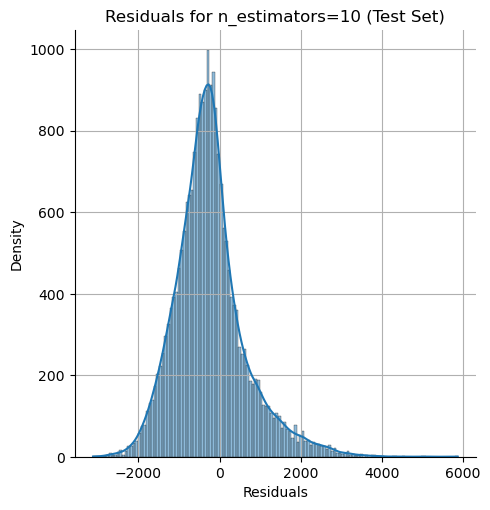

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

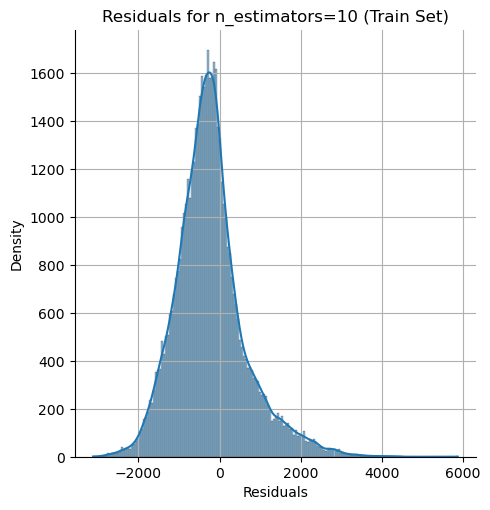

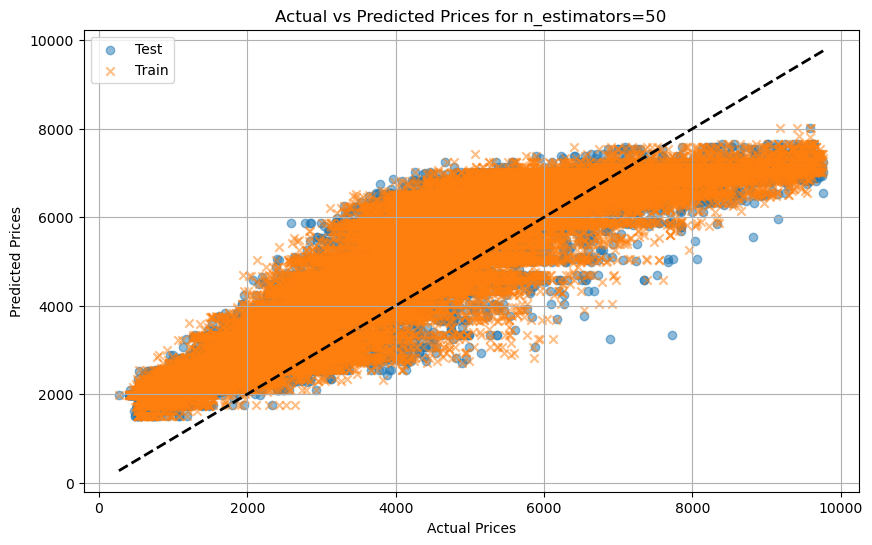

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

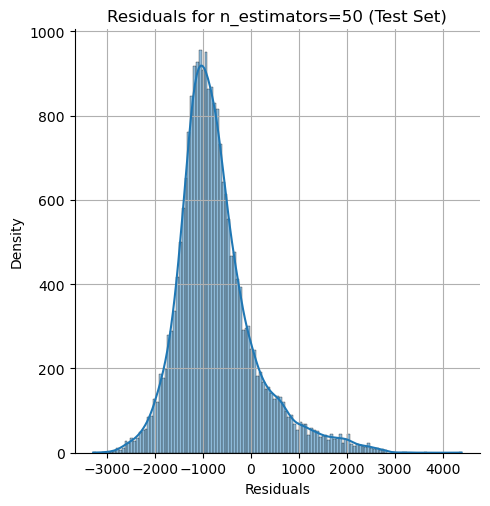

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

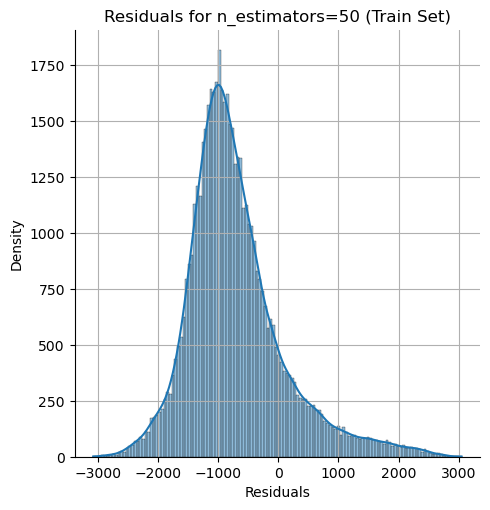

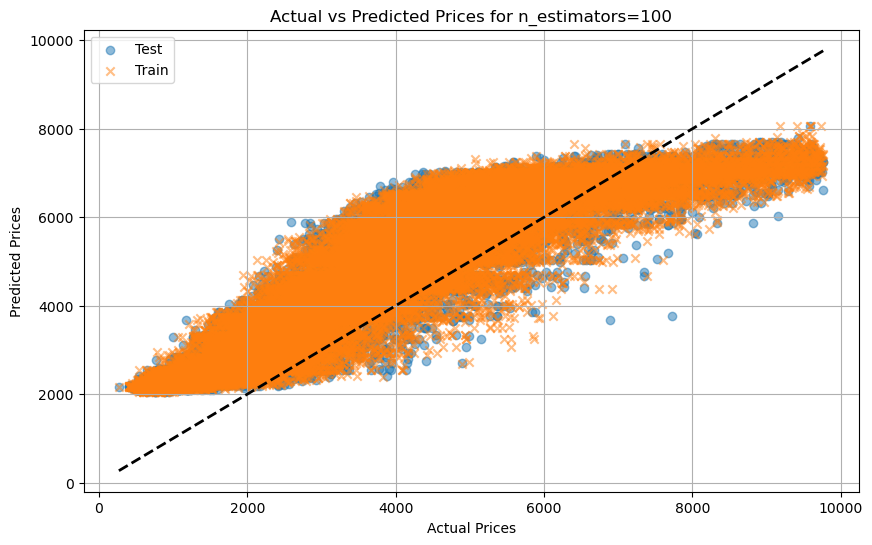

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

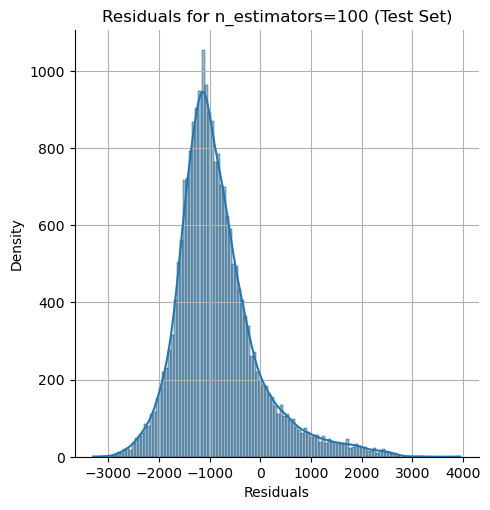

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

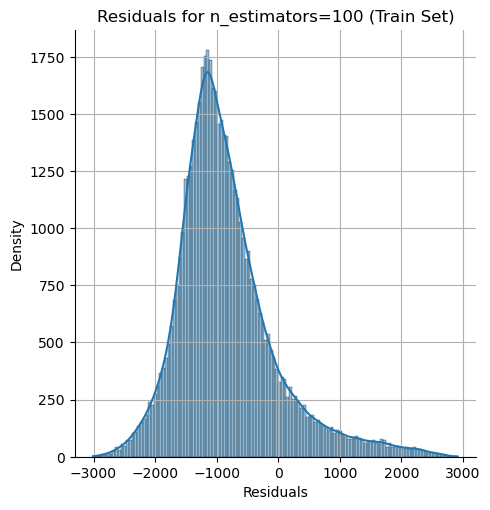

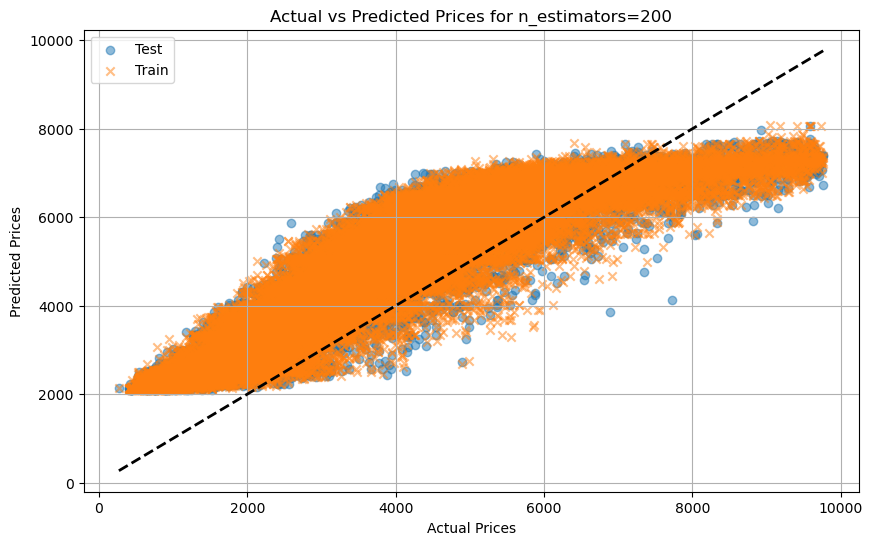

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

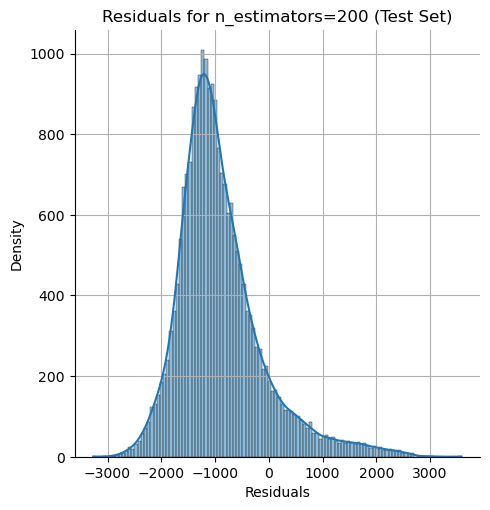

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

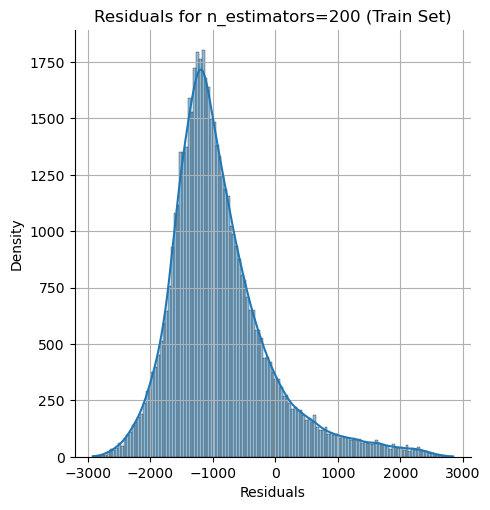

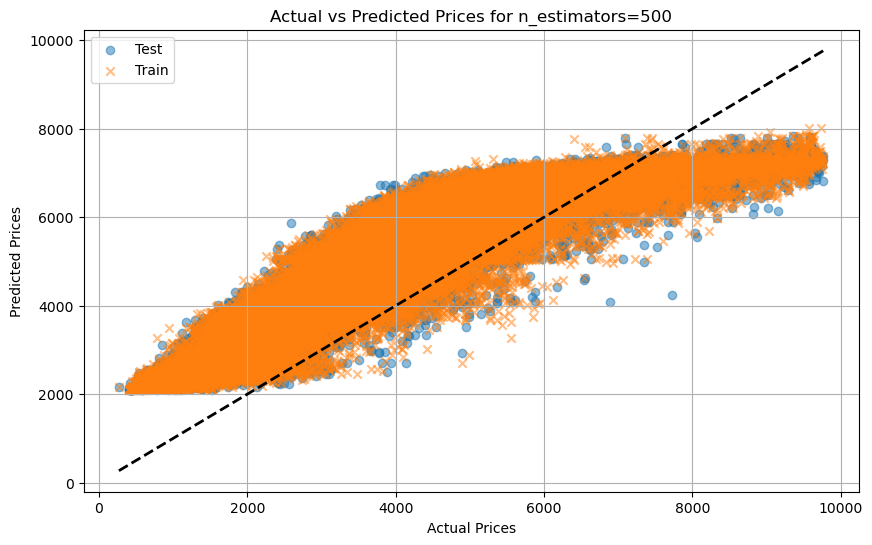

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

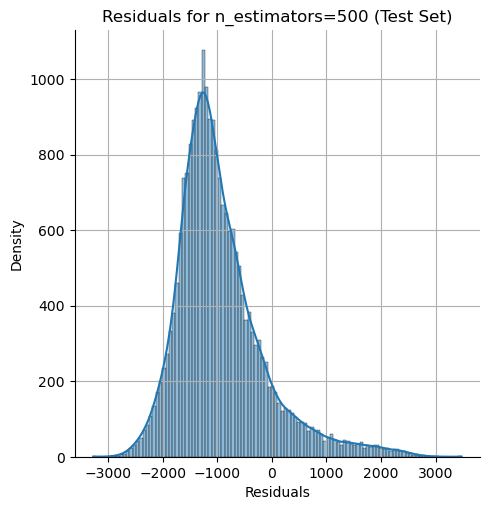

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

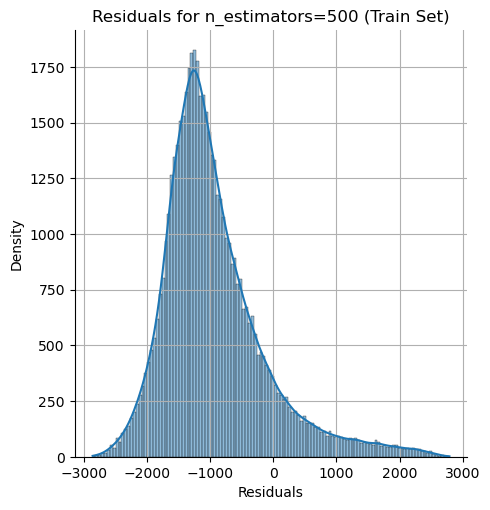

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
from collections import Counter
import re

# Load the data
data = pd.read_csv('booking_data.csv')

def convert_to_date(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

data['checkin_date'] = data['checkin_date'].apply(convert_to_date)
#data['checkin_day'] = data['checkin_date'].dt.day
data['checkin_month'] = data['checkin_date'].dt.month
o_data = data
# Drop non-numeric columns that are not one-hot encoded
data = data.drop(columns=['name','checkout_date', 'Snapshot Date', 'checkin_date'])

# Separate the features and target variable
X = data.drop(columns=['price'])
y = data['price']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# יצירת המודל
def evaluate_adaboost(n_estimators_list, X_train, y_train, X_test, y_test):
    results = {}
    for n_estimators in n_estimators_list:
        adaboost = AdaBoostRegressor(
            base_estimator=DecisionTreeRegressor(max_depth=4),
            n_estimators=n_estimators,
            random_state=42
        )
        adaboost.fit(X_train, y_train)
        
        # Evaluate on test set
        y_pred_test = adaboost.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)
        
        # Evaluate on train set
        y_pred_train = adaboost.predict(X_train)
        mse_train = mean_squared_error(y_train, y_pred_train)
        rmse_train = np.sqrt(mse_train)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
        
        results[n_estimators] = {
            'test': {'mse': mse_test, 'rmse': rmse_test, 'mae': mae_test, 'r2': r2_test, 'y_pred': y_pred_test},
            'train': {'mse': mse_train, 'rmse': rmse_train, 'mae': mae_train, 'r2': r2_train, 'y_pred': y_pred_train}
        }
    return results

# Choose different values for n_estimators
n_estimators_list = [10, 50, 100, 200, 500]

# Evaluate AdaBoost with different n_estimators
results = evaluate_adaboost(n_estimators_list, X_train, y_train, X_test, y_test)

# Convert results to a DataFrame for better visualization
results_df_test = pd.DataFrame([(n, res['test']['mse'], res['test']['rmse'], res['test']['mae'], res['test']['r2']) for n, res in results.items()],
                          columns=['n_estimators', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])

results_df_train = pd.DataFrame([(n, res['train']['mse'], res['train']['rmse'], res['train']['mae'], res['train']['r2']) for n, res in results.items()],
                          columns=['n_estimators', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])

# Display the results for test set
print("Test Set Results:")
print(results_df_test)

# Display the results for train set
print("Train Set Results:")
print(results_df_train)

# Plot the Mean Squared Error for different values of n_estimators for test set
plt.figure(figsize=(10, 6))
plt.plot(results_df_test['n_estimators'], results_df_test['Mean Squared Error'], marker='o', label='Test MSE')
plt.plot(results_df_train['n_estimators'], results_df_train['Mean Squared Error'], marker='o', label='Train MSE', linestyle='--')
plt.title('AdaBoost Errors for Different n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot scatter plots of actual vs predicted values for each n_estimators for both train and test sets
for n_estimators in n_estimators_list:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, results[n_estimators]['test']['y_pred'], alpha=0.5, label='Test')
    plt.scatter(y_train, results[n_estimators]['train']['y_pred'], alpha=0.5, label='Train', marker='x')
    plt.title(f'Actual vs Predicted Prices for n_estimators={n_estimators}')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot residuals for test set
    residuals_test = y_test - results[n_estimators]['test']['y_pred']
    plt.figure(figsize=(10, 6))
    sns.displot(residuals_test, kde=True)
    plt.title(f'Residuals for n_estimators={n_estimators} (Test Set)')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
    
    # Plot residuals for train set
    residuals_train = y_train - results[n_estimators]['train']['y_pred']
    plt.figure(figsize=(10, 6))
    sns.displot(residuals_train, kde=True)
    plt.title(f'Residuals for n_estimators={n_estimators} (Train Set)')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()



כאשר המודל מתאים יתר על המידה לנתוני האימון, לאחר הוספה של עוד ועוד אסיטמיטורים, הוא לומד את הרעש ואת המידע הלא רלוונטי בנתונים.
כתוצאה מכך, הוא מתקשה לנבא בצורה נכונה על נתונים חדשים שלא היו בתהליך האימון, מה שמוביל לעלייה בשגיאות על סט הנתונים הבדיקתי או על נתונים חדשים.

In [2]:
def convert_to_date(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

# הוספת פיצ'ר ליום בשבוע ע"ב תאריך צקאין
def get_day_of_week(date_obj):
    # קבלת מספר היום בשבוע (0 - ראשון, 1 - שני, וכן הלאה)
    day_of_week = date_obj.weekday()
    return day_of_week

# החלפת הערכים בעמודה 'bed_type' לערכי הסיווג החדש
o_data['checkin_day_week'] = o_data['checkin_date'].apply(get_day_of_week)


In [ ]:
def classify_bed_type(value):
    if value == 7 or value == 8:
        return 1
    else:
        return 0

# החלפת הערכים בעמודה 'bed_type' לערכי הסיווג החדש
o_data['two_beds'] = o_data['bed_category'].apply(classify_bed_type)
o_data = o_data.drop(columns=['name','checkout_date', 'Snapshot Date','checkin_date'])

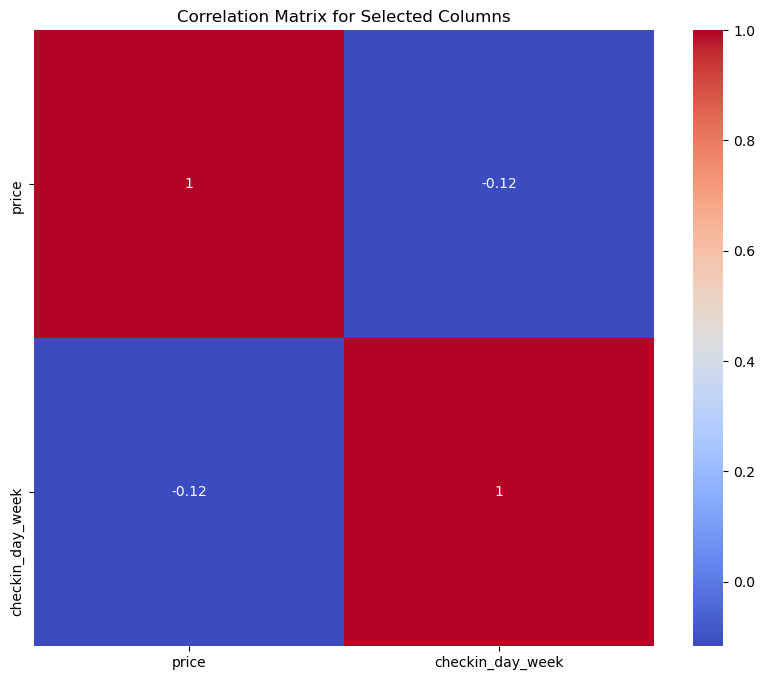

In [3]:
selected_columns = ['price', 'checkin_day_week']
selected_data = o_data[selected_columns]
correlation_matrix = selected_data.corr()

# הצגת מטריצת הקורלציה
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Columns')
plt.show()


C:\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test Set Results:
   n_estimators  Mean Squared Error  Root Mean Squared Error  \
0            10        7.870349e+05               887.149893   
1            50        1.001635e+06              1000.817269   
2           100        1.193356e+06              1092.408196   
3           200        1.299047e+06              1139.757554   
4           500        1.387629e+06              1177.976829   

   Mean Absolute Error       R^2  
0           680.705953  0.804530  
1           862.830289  0.751231  
2           966.623028  0.703615  
3          1017.999993  0.677365  
4          1056.541314  0.655365  
Train Set Results:
   n_estimators  Mean Squared Error  Root Mean Squared Error  \
0            10        7.695581e+05               877.244609   
1            50        9.799648e+05               989.931738   
2           100        1.172971e+06              1083.038049   
3           200        1.282660e+06              1132.545857   
4           500        1.373017e+06             

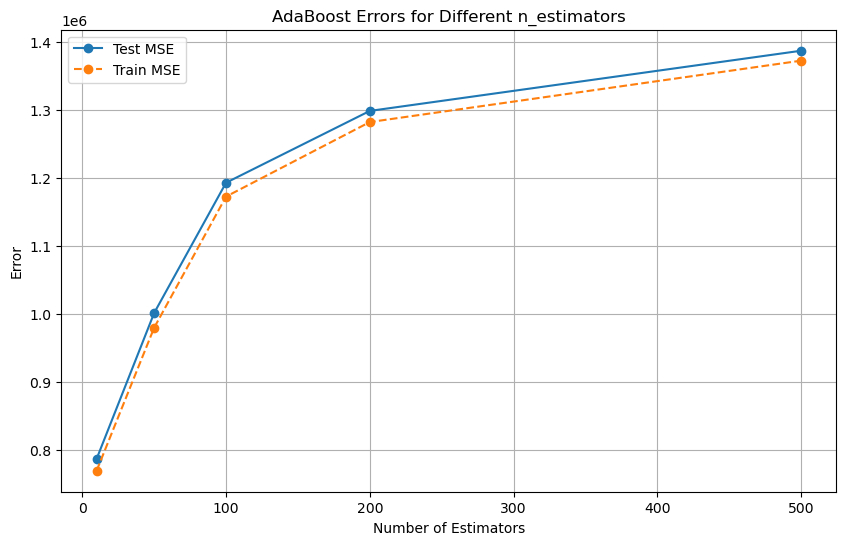

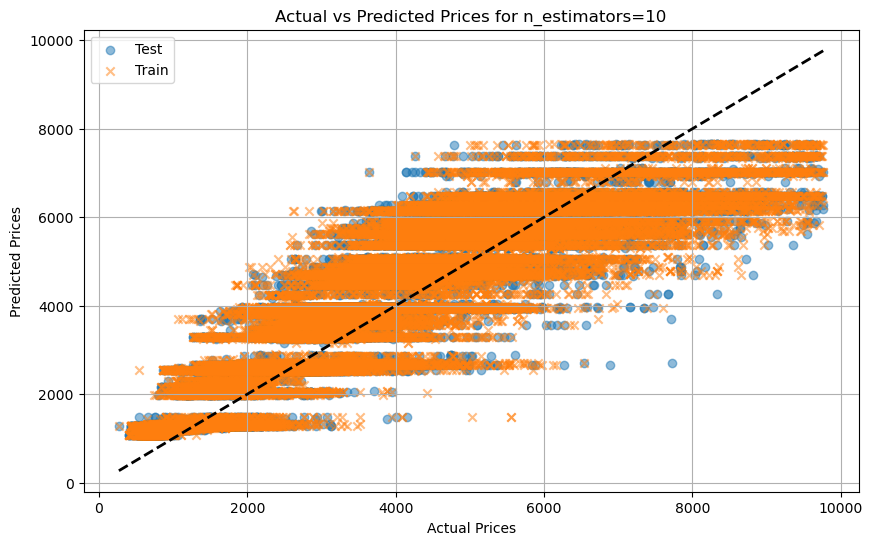

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

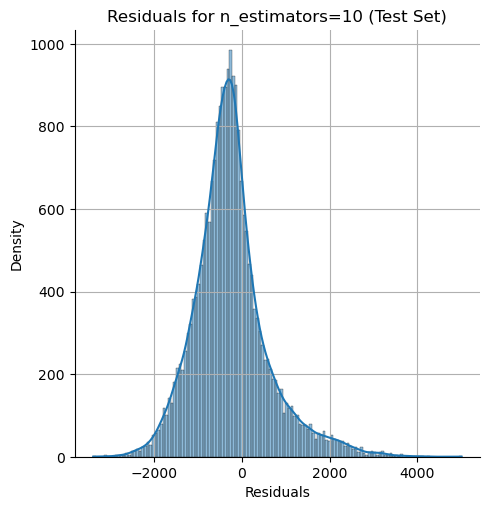

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

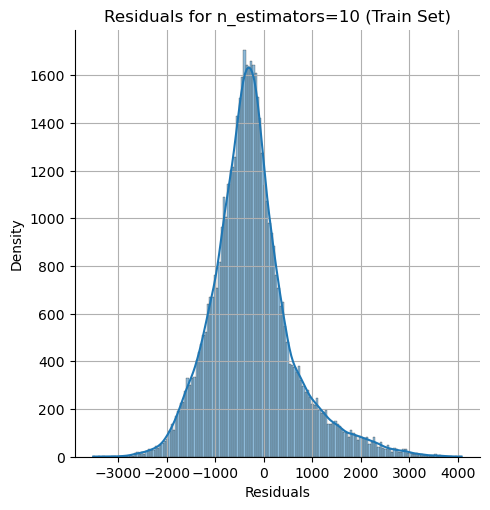

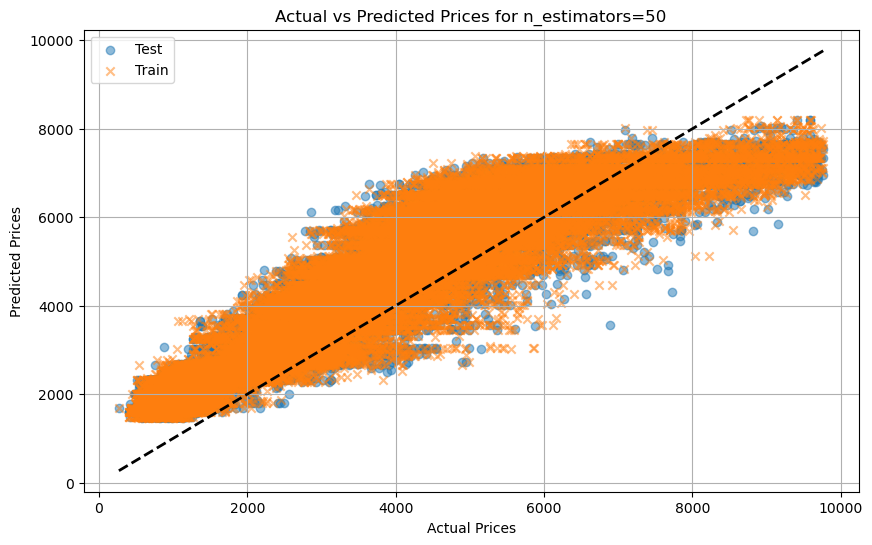

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

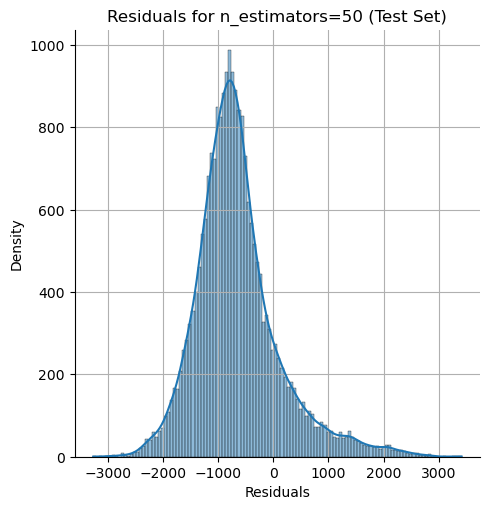

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

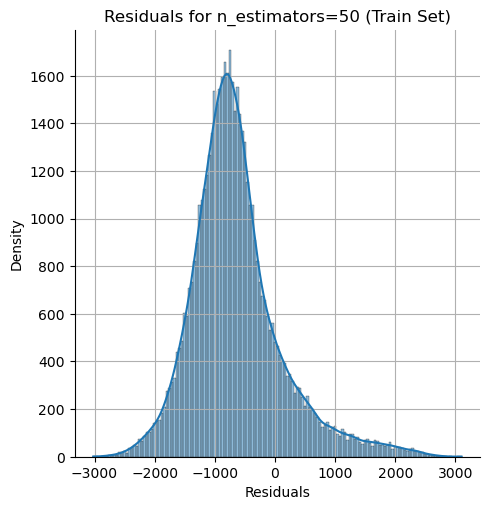

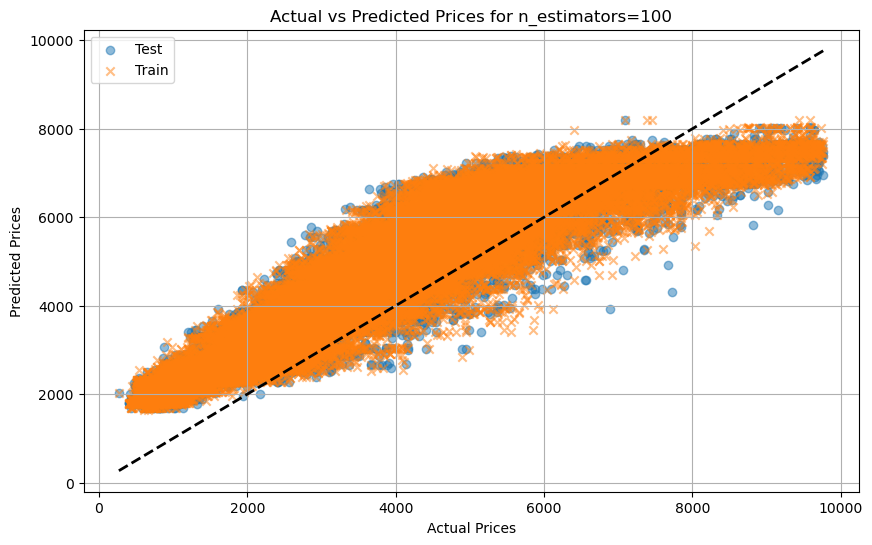

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

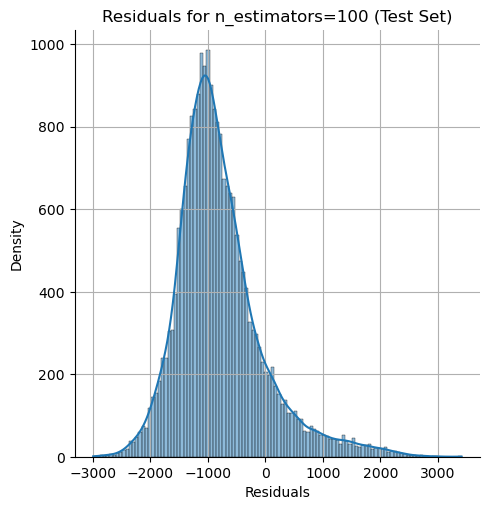

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

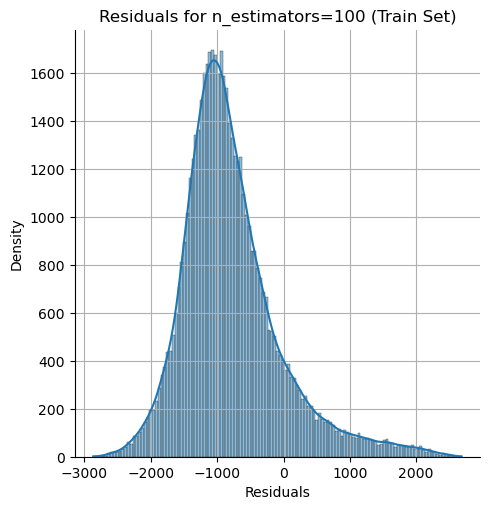

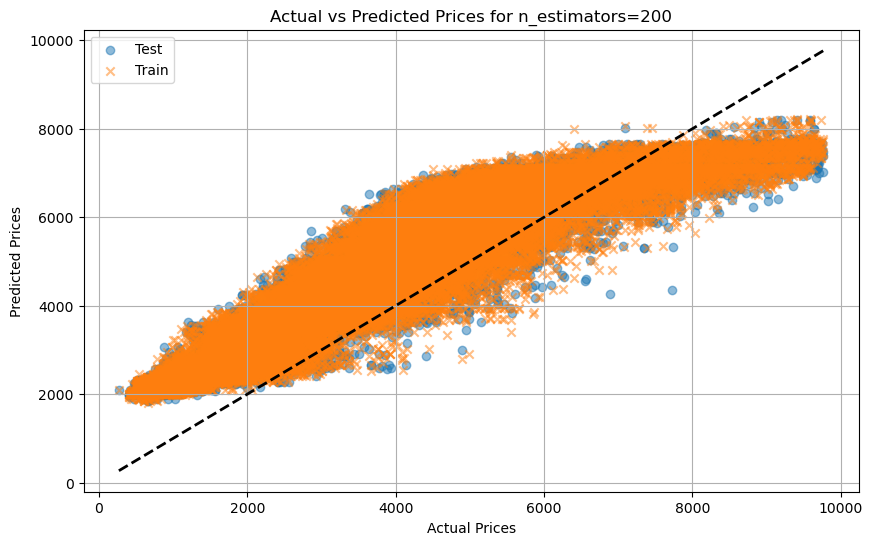

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

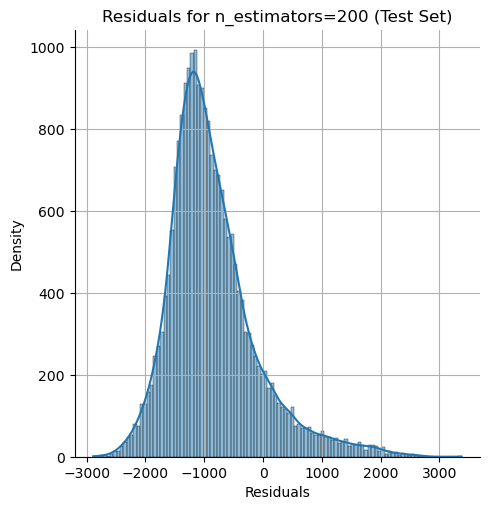

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

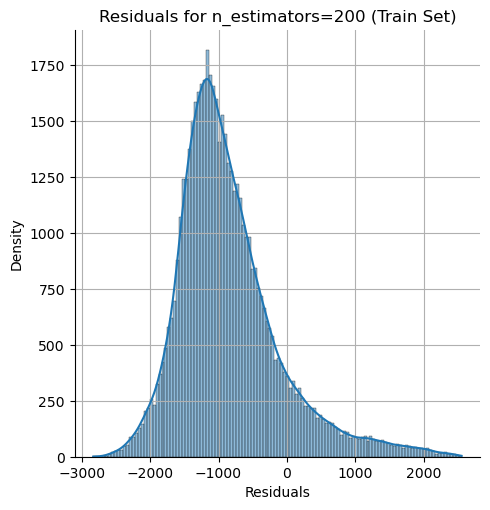

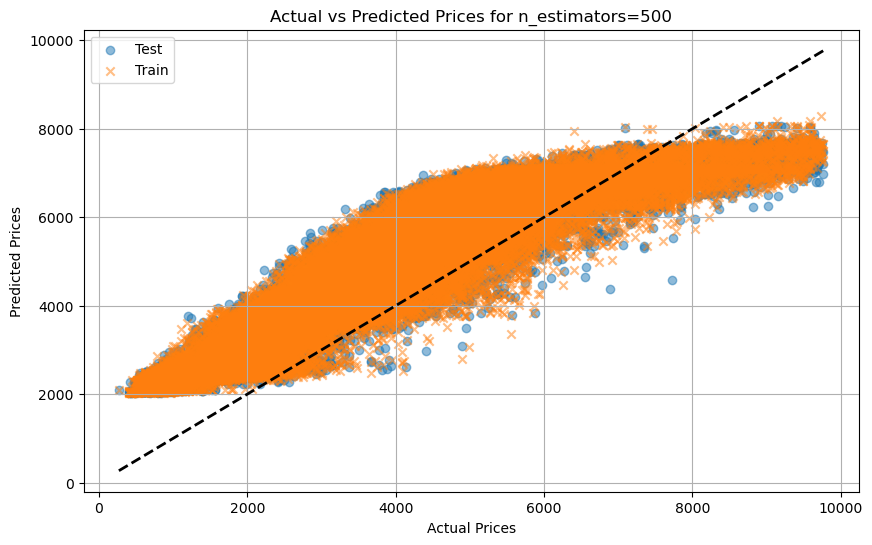

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

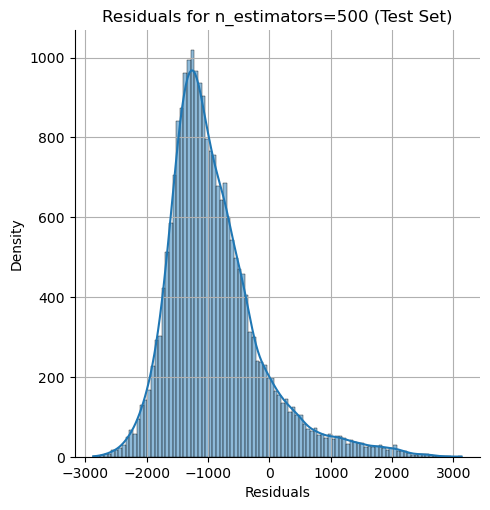

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

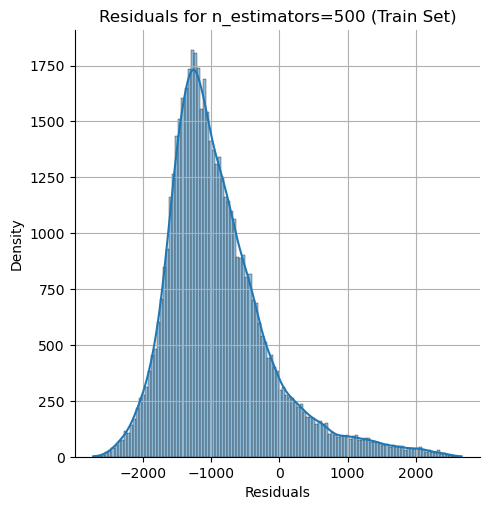

In [4]:
data = o_data
# Separate the features and target variable
X = data.drop(columns=['price'])
y = data['price']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# יצירת המודל
def evaluate_adaboost(n_estimators_list, X_train, y_train, X_test, y_test):
    results = {}
    for n_estimators in n_estimators_list:
        adaboost = AdaBoostRegressor(
            base_estimator=DecisionTreeRegressor(max_depth=4),
            n_estimators=n_estimators,
            random_state=42
        )
        adaboost.fit(X_train, y_train)
        
        # Evaluate on test set
        y_pred_test = adaboost.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)
        
        # Evaluate on train set
        y_pred_train = adaboost.predict(X_train)
        mse_train = mean_squared_error(y_train, y_pred_train)
        rmse_train = np.sqrt(mse_train)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
        
        results[n_estimators] = {
            'test': {'mse': mse_test, 'rmse': rmse_test, 'mae': mae_test, 'r2': r2_test, 'y_pred': y_pred_test},
            'train': {'mse': mse_train, 'rmse': rmse_train, 'mae': mae_train, 'r2': r2_train, 'y_pred': y_pred_train}
        }
    return results

# Choose different values for n_estimators
n_estimators_list = [10, 50, 100, 200, 500]

# Evaluate AdaBoost with different n_estimators
results = evaluate_adaboost(n_estimators_list, X_train, y_train, X_test, y_test)

# Convert results to a DataFrame for better visualization
results_df_test = pd.DataFrame([(n, res['test']['mse'], res['test']['rmse'], res['test']['mae'], res['test']['r2']) for n, res in results.items()],
                          columns=['n_estimators', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])

results_df_train = pd.DataFrame([(n, res['train']['mse'], res['train']['rmse'], res['train']['mae'], res['train']['r2']) for n, res in results.items()],
                          columns=['n_estimators', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])

# Display the results for test set
print("Test Set Results:")
print(results_df_test)

# Display the results for train set
print("Train Set Results:")
print(results_df_train)

# Plot the Mean Squared Error for different values of n_estimators for test set
plt.figure(figsize=(10, 6))
plt.plot(results_df_test['n_estimators'], results_df_test['Mean Squared Error'], marker='o', label='Test MSE')
plt.plot(results_df_train['n_estimators'], results_df_train['Mean Squared Error'], marker='o', label='Train MSE', linestyle='--')
plt.title('AdaBoost Errors for Different n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot scatter plots of actual vs predicted values for each n_estimators for both train and test sets
for n_estimators in n_estimators_list:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, results[n_estimators]['test']['y_pred'], alpha=0.5, label='Test')
    plt.scatter(y_train, results[n_estimators]['train']['y_pred'], alpha=0.5, label='Train', marker='x')
    plt.title(f'Actual vs Predicted Prices for n_estimators={n_estimators}')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot residuals for test set
    residuals_test = y_test - results[n_estimators]['test']['y_pred']
    plt.figure(figsize=(10, 6))
    sns.displot(residuals_test, kde=True)
    plt.title(f'Residuals for n_estimators={n_estimators} (Test Set)')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
    
    # Plot residuals for train set
    residuals_train = y_train - results[n_estimators]['train']['y_pred']
    plt.figure(figsize=(10, 6))
    sns.displot(residuals_train, kde=True)
    plt.title(f'Residuals for n_estimators={n_estimators} (Train Set)')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

## feature importance לפי הקוד עצמו

C:\python\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


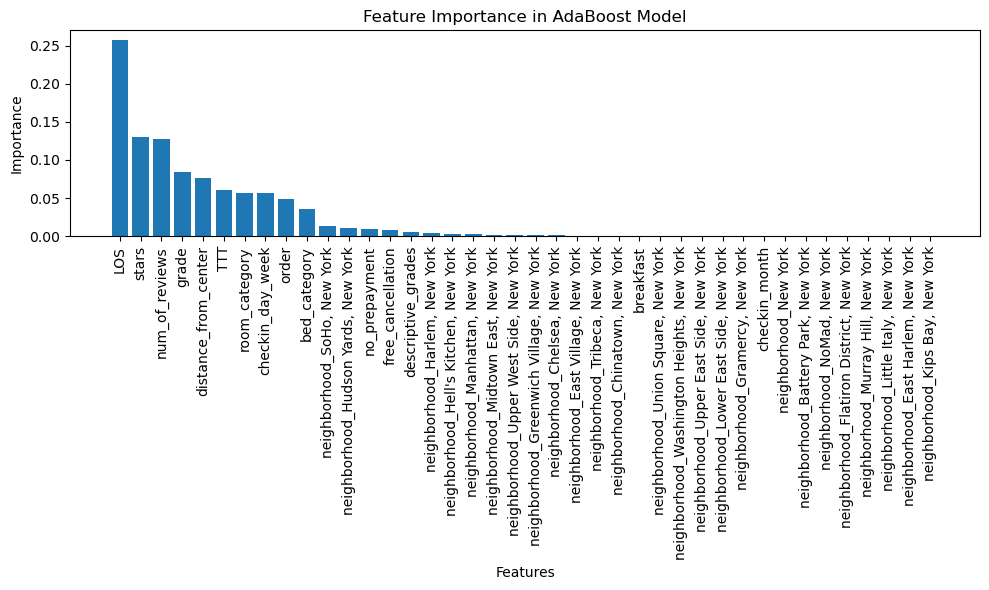

                                      feature  importance
9                                         LOS    0.257193
5                                       stars    0.130132
2                              num_of_reviews    0.126966
0                                       grade    0.084454
4                        distance_from_center    0.075833
8                                         TTT    0.060654
11                              room_category    0.056225
39                           checkin_day_week    0.056117
10                                      order    0.049413
12                               bed_category    0.036107
32                neighborhood_SoHo, New York    0.014064
23        neighborhood_Hudson Yards, New York    0.010940
7                               no_prepayment    0.009945
6                           free_cancellation    0.008220
1                          descriptive_grades    0.004954
21              neighborhood_Harlem, New York    0.004662
22      neighb

In [5]:
best_n_estimators = 200
best_model = AdaBoostRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=4),
    n_estimators=best_n_estimators,
    random_state=42
)
best_model.fit(X_train, y_train)

# חשב את חשיבות התכונות
feature_importance = best_model.feature_importances_

# צור DataFrame עם שמות התכונות וחשיבותן
feature_names = X.columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})

# מיין לפי חשיבות בסדר יורד
importance_df = importance_df.sort_values('importance', ascending=False)

# הצג את חשיבות התכונות בגרף
plt.figure(figsize=(10, 6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in AdaBoost Model')
plt.tight_layout()
plt.show()

# הדפס את חשיבות התכונות
print(importance_df)

## feature importance בקופסא שחורה

                                      feature    importance
9                                         LOS  1.254043e+00
5                                       stars  1.155658e-01
0                                       grade  3.554209e-02
4                        distance_from_center  2.508429e-02
8                                         TTT  2.443021e-02
39                           checkin_day_week  2.209889e-02
2                              num_of_reviews  1.860543e-02
10                                      order  1.491509e-02
12                               bed_category  7.855074e-03
11                              room_category  5.377117e-03
22      neighborhood_Hell's Kitchen, New York  2.703587e-03
7                               no_prepayment  1.544605e-03
6                           free_cancellation  1.392899e-03
32                neighborhood_SoHo, New York  1.278163e-03
1                          descriptive_grades  1.107225e-03
28        neighborhood_Midtown East, New

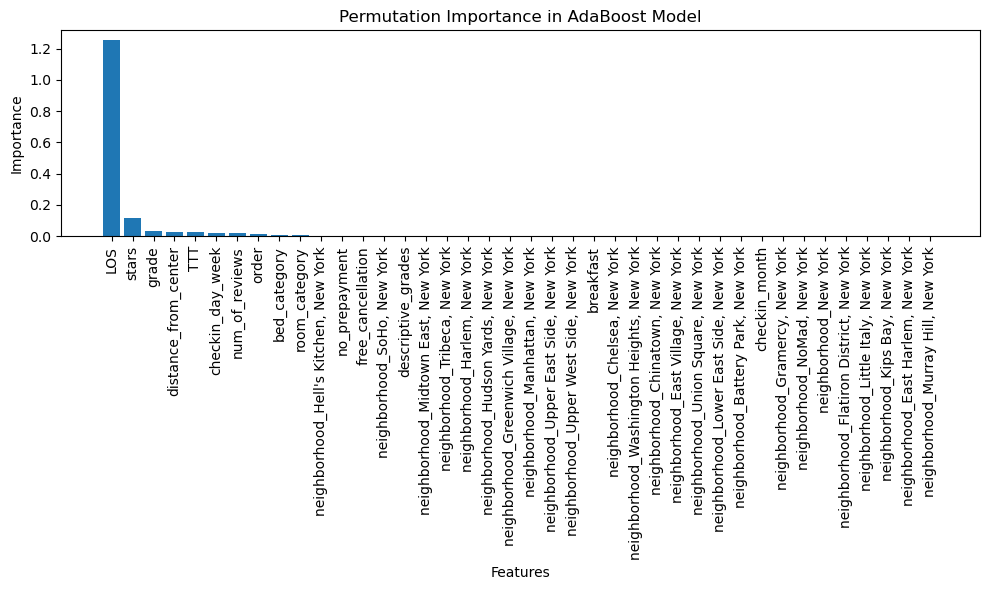

In [6]:
from sklearn.inspection import permutation_importance


# חישוב חשיבות התכונות באמצעות Permutation Importance
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=5, random_state=42)

# יצירת DataFrame לחשיבות התכונות
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)

# הצגת הטבלה
print(feature_importance_df)

# גרף הצגת חשיבות התכונות
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Importance in AdaBoost Model')
plt.tight_layout()
plt.show()

